In [1]:

import PKoopmanDL as pkdl
import numpy as np
import matplotlib.pyplot as plt
import torch

# config_file = "vdpm-edmd.json"
# config_file = "vdpm-edmddl.json"
config_file = "vdpm-paramkoopman.json"
tmp_func = lambda x: x
observable_func = pkdl.ObservableFunction(tmp_func, 2)
# solver = pkdl.EDMDRBFSolverWrapper(config_file)
# solver = pkdl.EDMDDLSolverWrapper(config_file)
solver = pkdl.ParamKoopmanDLSolverWrapper(config_file)
solver.setup(observable_func)
K = solver.solve()

2024-11-29 14:57:57,288 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating data...
2024-11-29 14:57:57,313 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating trajectories...
Generating trajectories: 100%|██████████| 49/49 [00:00<00:00, 723.09it/s]
2024-11-29 14:57:57,383 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating labels...
2024-11-29 14:57:57,390 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Data generated.
2024-11-29 14:57:57,393 PKoopmanDL: [INFO] [ParamKoopmanDLSolver] Solving...
Training: 100%|██████████| 1000/1000 [06:54<00:00,  2.41it/s, train_loss=2.87e-03, val_loss=4.02e-03]


## Plot

2024-11-29 15:14:28,453 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating data...
2024-11-29 15:14:28,455 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating trajectories...
Generating trajectories: 100%|██████████| 48/48 [00:00<00:00, 807.49it/s]
2024-11-29 15:14:28,517 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating labels...
2024-11-29 15:14:28,519 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Data generated.
Generating trajectory: 100%|██████████| 49/49 [00:00<00:00, 736.62it/s]


Text(0, 0.5, '$x_{2}$')

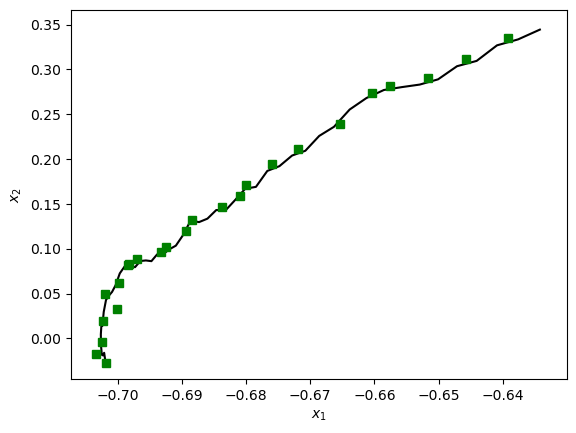

In [9]:
koopman_dynamics = pkdl.KoopmanODEDynamics(solver.dynamics, K, solver.dictionary, 2, 2)
# predict
dataset_predict = pkdl.ParamKoopmanDataSet(solver.dynamics)
dataset_predict.generate_data(1, 1, solver.traj_len - 1, solver.x_min, solver.x_max, solver.param_min, solver.param_max, param_time_dependent=True)
x0 = torch.unsqueeze(dataset_predict.data_x[0], dim=0)
param = dataset_predict.data_param
p = koopman_dynamics.traj(x0, param, solver.traj_len)
# p = K.predict(x0, solver.dictionary, [1,2], solver.traj_len).detach()
x_est_traj = p[0, :, :].detach().numpy()

x_traj = solver.dynamics.traj(x0, param, solver.traj_len)[0, :, :].detach().numpy()
plt.plot(x_traj[:,0], x_traj[:,1], 'k-', label='Exact', markevery=2)
plt.plot(x_est_traj[:,0], x_est_traj[:,1], 'gs', label='ParamKoopman', markevery=2)

plt.xlabel(r"$x_{1}$")
plt.ylabel(r"$x_{2}$")
# plt.legend(loc='best',prop={'size':14})